<a href="https://colab.research.google.com/github/delrio-jaemee/CSST106-CS4B-DELRIO/blob/main/4B_DEL_RIO_MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sift Feature Extraction

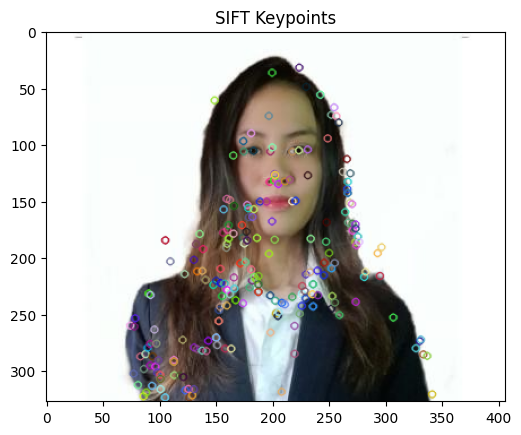

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/jae (1).jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize Sift Detector
sift = cv2.SIFT_create()

# Detect keypoint and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

Orb Feature Extraction

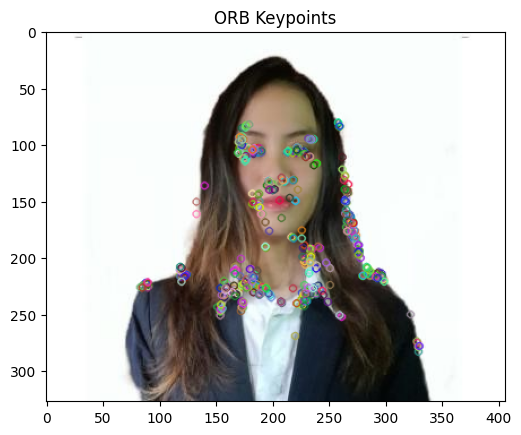

In [ ]:
# Initialize ORB Detector
orb = cv2.ORB_create()

# Initialize keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

Feature Extraction

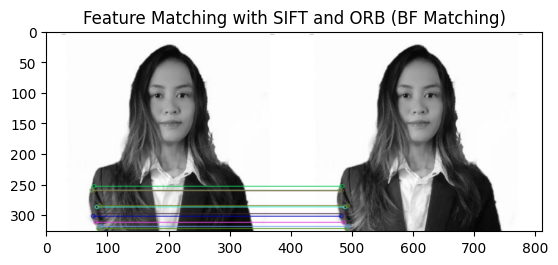

In [ ]:
# Load two images
image1 = cv2.imread('/content/jae (1).jpg', 0)
image2 = cv2.imread('/content/jae (1).jpg', 0)

# SIFT Detector
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# ORB Detector
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort the matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None,
                                flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT and ORB (BF Matching)')
plt.show()

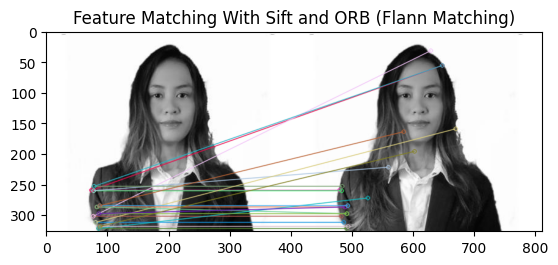

In [ ]:
# Initialize matcher using FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match Descrpitors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Sort the matches base on distance
matches = sorted(matches, key=lambda x: x[0].distance)

# Draw matches
image_matches = cv2.drawMatchesKnn(image1, keypoints1, image2, keypoints2, matches[:10], None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Feature Matching With Sift and ORB (Flann Matching)')
plt.show()

Image alingment using Homography

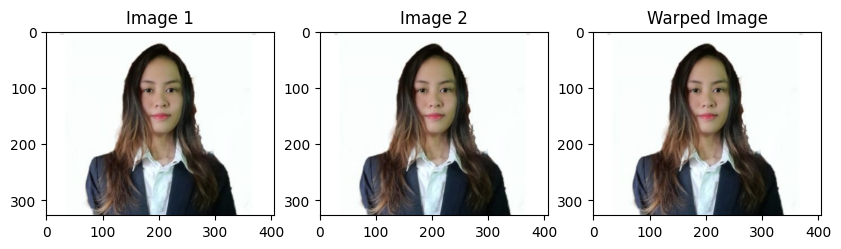

In [ ]:
# Load Images
image1 = cv2.imread('/content/jae (1).jpg')
image2 = cv2.imread('/content/jae (1).jpg')

# Convert Images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# ORB Detector
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Match Features using BF Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)

dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Find Homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp one image to align with other
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

# Display original and warped images side-by-side
plt.figure(figsize=(10, 5))

# Display original images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Warped Image')

plt.show()

Comparison Analysis

In [ ]:
import time

# Function to analyze SIFT and ORB performance
def analyze_features(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # SIFT analysis
    sift = cv2.SIFT_create()
    start_time = time.time()
    sift_keypoints, sift_descriptors = sift.detectAndCompute(gray_image, None)
    end_time = time.time()
    sift_time = end_time - start_time
    print("SIFT:")
    print(f"  - Number of keypoints: {len(sift_keypoints)}")
    print(f"  - Processing time: {sift_time:.4f} seconds")


    # ORB analysis
    orb = cv2.ORB_create()
    start_time = time.time()
    orb_keypoints, orb_descriptors = orb.detectAndCompute(gray_image, None)
    end_time = time.time()
    orb_time = end_time - start_time
    print("ORB:")
    print(f"  - Number of keypoints: {len(orb_keypoints)}")
    print(f"  - Processing time: {orb_time:.4f} seconds")

# Results
analyze_features('/content/jae (1).jpg')

SIFT:
  - Number of keypoints: 231
  - Processing time: 0.0602 seconds
ORB:
  - Number of keypoints: 500
  - Processing time: 0.0039 seconds


In [ ]:
# Analysis
analysis = """SIFT Vs ORB
            - SIFT works slower than ORB however it extracts more keypoints than ORB does.
            - It depends on the situation when to use both methods but at the same time their both effective.

BF vs FLANN Matcher
            - BF applies horizontal lines that indicates the matches between both images.
            - Flann Matcher applies a set of Z lines that indicates the matches between both images."""

print(analysis)

SIFT Vs ORB
            - SIFT works slower than ORB however it extracts more keypoints than ORB does.
            - It depends on the situation when to use both methods but at the same time their both effective.

BF vs FLANN Matcher
            - BF applies horizontal lines that indicates the matches between both images.
            - Flann Matcher applies a set of Z lines that indicates the matches between both images.
